In [41]:
import pandas as pd
from matplotlib import pyplot as plt 
import plotly.express as px
import numpy as np 
import os
from datetime import datetime

In [42]:
dmr_dir_path = '/home/michalula/code/epiCausality/epiCode/analyze_ont_data/T2T_v2.0_mapped/K562/compare/modkit_dmr/mc_07/filtered/'
dmr_K562_ZFPoffHigh_vs_Unedit_filtered_mC07 = dmr_dir_path + '20251124_dmr_K562_ZFPoffHigh_vs_Unedit_filtered_mC07.csv'
dmr_K562_ZFPoffHigh_vs_Unedit_filtered_mC07


'/home/michalula/code/epiCausality/epiCode/analyze_ont_data/T2T_v2.0_mapped/K562/compare/modkit_dmr/mc_07/filtered/20251124_dmr_K562_ZFPoffHigh_vs_Unedit_filtered_mC07.csv'

In [43]:
# pd load csv
df_dmr_K562_ZFPoffHigh_vs_Unedit_filtered_mC07 = pd.read_csv(dmr_K562_ZFPoffHigh_vs_Unedit_filtered_mC07)
df_dmr_K562_ZFPoffHigh_vs_Unedit_filtered_mC07


,Unnamed: 0,chrom,start,end,name,score,strand,samplea_counts,samplea_total,sampleb_counts,...,cg_unit_pair_id,efsize-score,score-efsize,score_scaled,efsize-score_scaled,start_hg38,end_hg38,start_t2tv2,end_t2tv2,score_norm
0,0,chr1,206583089,206583090,.,-0.334175,+,m:0,11,m:0,...,CG_-1.+,0.334175,-0.334175,0.000044,-0.000044,207317793,207317794,206583089,206583090,0.000044
1,1,chr1,206583090,206583091,.,-0.140460,-,m:1,11,m:0,...,CG_-1.-,0.231369,-0.231369,0.001057,0.089852,207317794,207317795,206583090,206583091,0.001057
2,2,chr1,206583173,206583174,.,2.267680,+,m:445,506,m:69,...,CG_0.+,-2.171771,2.171771,0.013655,0.082254,207317877,207317878,206583173,206583174,0.013655
3,3,chr1,206583174,206583175,.,-0.186045,-,m:540,592,m:66,...,CG_0.-,0.204153,-0.204153,0.000819,0.017289,207317878,207317879,206583174,206583175,0.000819
4,4,chr1,206583387,206583388,.,0.170182,+,m:44,627,m:4,...,CG_1.+,-0.143660,0.143660,0.002682,0.023839,207318091,207318092,206583387,206583388,0.002682
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
281,281,chr1,206589931,206589932,.,-0.309418,-,m:22,27,m:5,...,CG_139.-,0.290900,-0.290900,0.000174,-0.018692,207324635,207324636,206589931,206589932,0.000174
282,282,chr1,206589955,206589956,.,-0.213918,+,m:36,39,m:15,...,CG_140.+,0.254642,-0.254642,0.000673,0.040051,207324659,207324660,206589955,206589956,0.000673
283,283,chr1,206589956,206589957,.,-0.219006,-,m:18,20,m:5,...,CG_140.-,0.285673,-0.285673,0.000647,0.066020,207324660,207324661,206589956,206589957,0.000647
284,284,chr1,206590032,206590033,.,3.092622,+,m:19,30,m:17,...,CG_141.+,-3.403733,3.403733,0.017970,-0.329081,207324736,207324737,206590032,206590033,0.017970


In [44]:
dmr_df = df_dmr_K562_ZFPoffHigh_vs_Unedit_filtered_mC07 
experiment_codition="K562_ZFPoffHigh_vs_Unedit_filtered_mC07"
out_dir=dmr_dir_path
pvalue_thresh=0.005

# def plot_dmr_effect_size_bar(dmr_df, experiment_codition, out_dir, pvalue_thresh=0.005):
# Ensure output directory exists
os.makedirs(out_dir, exist_ok=True)
# Bar: effect size per position (without sorting) with effect size colors 
# dmr_df['label'] = dmr_df['pos'] + ":" + dmr_df['strand'].astype(str)

fig_bar_unsorted = px.bar(
    dmr_df,
    x=dmr_df.index, 
    y='effect_size',        
    color='map_pval_less005',
    title=f"Effect size & p-vals<0.005 for all CGs (n={len(dmr_df)}) <br>{experiment_codition}",
    labels={'effect_size':'Effect size (A - B)','label':'position:strand'}
)
        # hover_data=['map_pvalue','a_perc','b_perc','total_reads'],
        # x='label',

fig_bar_unsorted.update_layout(xaxis_tickangle=45, height=520)
bar_unsorted_path = os.path.join(out_dir, f"dmr_sig_effectsize_unsorted_p{pvalue_thresh:.3f}.html")
# fig_bar_unsorted.write_html(bar_unsorted_path, include_plotlyjs='cdn')
fig_bar_unsorted.show()
# print("Saved unsorted effect-size bar plot:", bar_unsorted_path)    
    
    
# Bar: effect size per position (without sorting) with effect size colors 
# dmr_df['label'] = dmr_df['pos'] + ":" + dmr_df['strand'].astype(str)
fig_bar_unsorted = px.bar(
    dmr_df,
    x=dmr_df.index, 
    y='score',        
    color='map_pval_less005',
    title=f"log marginal Likelihood(LML) score & p-vals<0.005 for all CGs (n={len(dmr_df)}) <br>{experiment_codition}",
    labels={'score':'LML','label':'position:strand'}
)
        # hover_data=['map_pvalue','a_perc','b_perc','total_reads'],
        # x='label',

fig_bar_unsorted.update_layout(xaxis_tickangle=45, height=520)
bar_unsorted_path = os.path.join(out_dir, f"dmr_sig_effectsize_unsorted_p{pvalue_thresh:.3f}.html")
# fig_bar_unsorted.write_html(bar_unsorted_path, include_plotlyjs='cdn')
fig_bar_unsorted.show()
# print("Saved unsorted effect-size bar plot:", bar_unsorted_path)    
    
# plot_dmr_effect_size_bar(
#     dmr_df=dmr_K562_ZFPoffHigh_vs_Unedit_filtered_mC07, 
#                          experiment_codition="K562_ZFPoffHigh_vs_Unedit_filtered_mC07", 
#                          out_dir=dmr_dir_path, 
#                          pvalue_thresh=0.005)

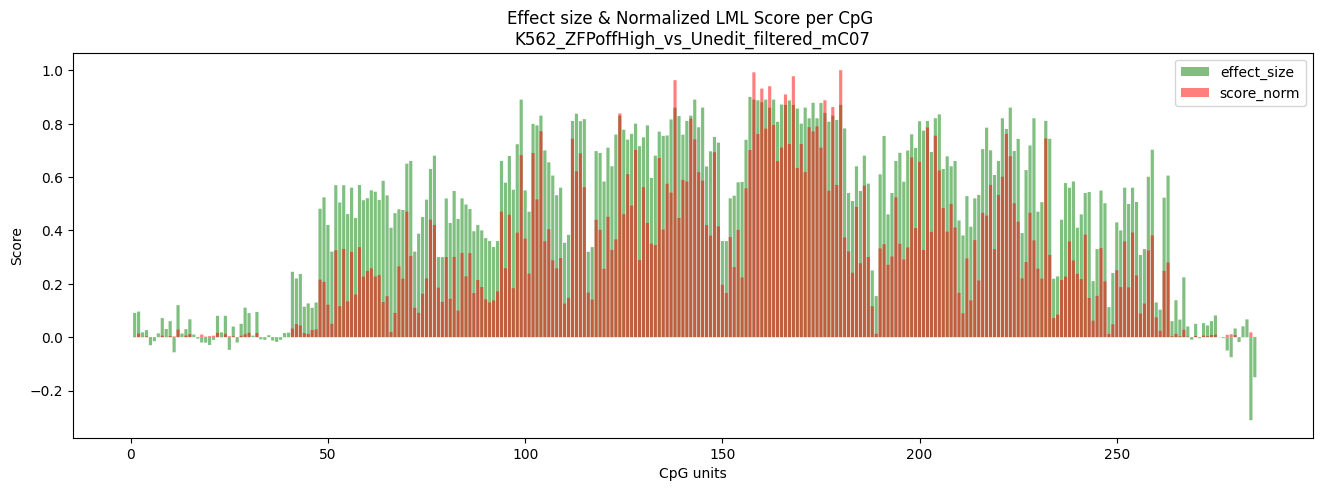

In [45]:
plt.figure(figsize=(16, 5))

plt.bar(np.arange(len(dmr_df['effect_size'])), dmr_df['effect_size'], 
        snap=False, alpha=0.5, label='effect_size', color='green') #, color=dmr_df['map_pval_less005'])

plt.bar(np.arange(len(dmr_df['score_norm'])), dmr_df['score_norm'], 
        snap=False, alpha=0.5, label='score_norm', color='red') #, color=dmr_df['map_pval_less005'])

# Add labels and title
plt.xlabel('CpG units')
plt.ylabel('Score') 
plt.title('Effect size & Normalized LML Score per CpG \n' + experiment_codition)
plt.legend()
plt.show()

In [ ]:
# plt.figure(figsize=(16, 5))
# plt.bar(np.arange(len(CGs_D35_CRoff_mc07_fracs)), CGs_D35_CRoff_mc07_fracs, snap=False, alpha=0.5, label='D35 mC > 0.7 CRISPRoff', color='magenta')

# plt.bar(np.arange(len(CGs_D6_CRoff_mc07_fracs)), CGs_D6_CRoff_mc07_fracs, snap=False, alpha=0.5, label='D6 mC > 0.7 CRISPRoff', color='deepskyblue')
# plt.bar(np.arange(len(CGs_D6_unedited_mc07_fracs)), CGs_D6_unedited_mc07_fracs, snap=False, alpha=0.5, label='D6 mC > 0.7 Unedited', color='navy')

# plt.bar(np.arange(len(CGs_D35_unedited_mc07_fracs)), CGs_D35_unedited_mc07_fracs, snap=False, alpha=0.5, label='D35 mC > 0.7 Unedited', color='red')
# # mediumblue.'turquoise', 'aquamarine', 'deepskyblue', 'dodgerblue', 'cornflowerblue', 'royalblue', 'blue', 'mediumblue', 'darkblue', 'navy', 'midnightblue'

# # Add labels and title
# plt.xlabel('CpG units')
# plt.ylabel('Fraction of mC')
# plt.title('Fraction of mC for CRISPROff and Unedited T cells CGs Day 6 \n mC threshold 70%')
# plt.legend()
# # Show the plot
# plt.show()


# # =======================
# plt.figure(figsize=(16, 5))
# plt.bar(np.arange(len(CGs_D6_CRoff_mc07_fracs)), CGs_D6_CRoff_mc07_fracs, snap=False, alpha=0.5, label='mC > 0.7 CRISPRoff', color='deepskyblue')
# plt.bar(np.arange(len(CGs_D6_unedited_mc07_fracs)), CGs_D6_unedited_mc07_fracs, snap=False, alpha=0.5, label='mC > 0.7 Unedited', color='navy')
# # mediumblue.'turquoise', 'aquamarine', 'deepskyblue', 'dodgerblue', 'cornflowerblue', 'royalblue', 'blue', 'mediumblue', 'darkblue', 'navy', 'midnightblue'

# # Add labels and title
# plt.xlabel('CpG units')
# plt.ylabel('Fraction of mC')
# plt.title('Fraction of mC for CRISPROff and Unedited T cells CGs Day 6 \n mC threshold 70%')
# plt.legend()
# # Show the plot
# plt.show()


# # DIFFERENCES

# dif_D6_mCthresh_7 =   CGs_D6_CRoff_mc07_fracs  - CGs_D6_unedited_mc07_fracs

# plt.figure(figsize=(16, 5))
# plt.bar(np.arange(len(dif_D6_mCthresh_7)), dif_D6_mCthresh_7, snap=False, alpha=0.5, label='CRoff - Unedited, D6 with 70% mC', color='turquoise'  )

# # Add labels and title
# plt.xlabel('CpG units')
# plt.yticks(list(plt.yticks()[0]) + [-0.1])

# plt.ylabel('Fraction of mC difference')
# plt.title('Fraction Differences between mC Unedited T cells Day 6 \n confidence threshold 70%')
# plt.legend()

# # Show the plot
# plt.show()


# plt.figure(figsize=(16, 5))
# plt.bar(np.arange(len(CGs_D35_CRoff_mc07_fracs)), CGs_D35_CRoff_mc07_fracs, snap=False, alpha=0.5, label='mC > 0.7 CRISPRoff', color='magenta')
# plt.bar(np.arange(len(CGs_D35_unedited_mc07_fracs)), CGs_D35_unedited_mc07_fracs, snap=False, alpha=0.5, label='mC > 0.7 Unedited', color='red')
# # mediumblue.'turquoise', 'aquamarine', 'deepskyblue', 'dodgerblue', 'cornflowerblue', 'royalblue', 'blue', 'mediumblue', 'darkblue', 'navy', 'midnightblue'

# # Add labels and title
# plt.xlabel('CpG units')
# plt.ylabel('Fraction of mC')
# plt.title('Fraction of mC for CRISPROff and Unedited T cells CGs Day 35 \n mC threshold 70%')
# plt.legend()
# # Show the plot
# plt.show()


# # DIFFERENCES

# dif_D6_mCthresh_7 =   CGs_D35_CRoff_mc07_fracs  - CGs_D35_unedited_mc07_fracs

# plt.figure(figsize=(16, 5))
# plt.bar(np.arange(len(dif_D6_mCthresh_7)), dif_D6_mCthresh_7, snap=False, alpha=0.5, label='CRoff - Unedited, D6 with 70% mC', color='pink'  )

# # Add labels and title
# plt.xlabel('CpG units')
# plt.yticks(list(plt.yticks()[0]) + [-0.1])

# plt.ylabel('Fraction of mC difference')
# plt.title('Fraction Differences between mC Unedited T cells Day 35 \n confidence threshold 70%')
# plt.legend()

# # Show the plot
# plt.show()